In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
sns.set()

In [85]:
#Loading the Dataset
apple = pd.read_csv("//Users//aayushmaan16//Downloads//AAPL.csv")
apple.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2021-08-17  150.229996  151.679993  149.089996  150.190002  149.353104   
1    2021-08-18  149.800003  150.720001  146.149994  146.360001  145.544434   
2    2021-08-19  145.029999  148.000000  144.500000  146.699997  145.882523   
3    2021-08-20  147.440002  148.500000  146.779999  148.190002  147.364243   
4    2021-08-23  148.309998  150.190002  147.889999  149.710007  148.875763   
..          ...         ...         ...         ...         ...         ...   
247  2022-08-10  167.679993  169.339996  166.899994  169.240005  169.240005   
248  2022-08-11  170.059998  170.990005  168.190002  168.490005  168.490005   
249  2022-08-12  169.820007  172.169998  169.399994  172.100006  172.100006   
250  2022-08-15  171.520004  173.389999  171.350006  173.190002  173.190002   
251  2022-08-16  172.779999  173.710007  171.660004  173.029999  173.029999   

       Volume  
0    

In [86]:
#To get the number of training days
print("training days =",apple.shape)

training days = (252, 7)


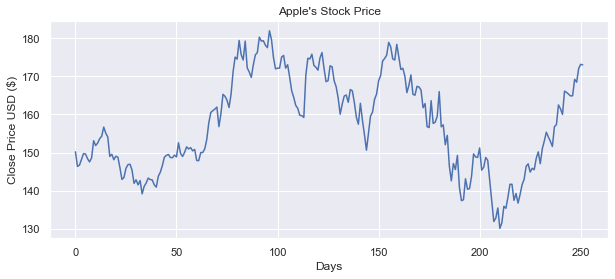

In [87]:
#Visualizing the close Data
plt.figure(figsize=(10,4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()


In [88]:
#To get the Close Data
apple = apple[['Close']]
print(apple.head())

        Close
0  150.190002
1  146.360001
2  146.699997
3  148.190002
4  149.710007


In [89]:
#Creating a variable to predict 'X' days in the future
futureDays = 25

In [90]:
#Creating a new target column shifted 'X' units/days up
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

        Close  Prediction
0  150.190002  145.850006
1  146.360001  146.830002
2  146.699997  146.919998
3  148.190002  145.369995
4  149.710007  141.910004
          Close  Prediction
247  169.240005         NaN
248  168.490005         NaN
249  172.100006         NaN
250  173.190002         NaN
251  173.029999         NaN


/var/folders/h7/hs52h8h96639qqp_tlhssln80000gn/T/ipykernel_57482/2734462519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple["Prediction"] = apple[["Close"]].shift(-futureDays)


In [91]:
#Creating a feature dataset (x) and convert into a numpy array and remove last 'x' rows/days
import numpy as np
x = np.array(apple.drop(['Prediction'], 1))[:-futureDays]
print(x)

[[150.190002]
 [146.360001]
 [146.699997]
 [148.190002]
 [149.710007]
 [149.619995]
 [148.360001]
 [147.539993]
 [148.600006]
 [153.119995]
 [151.830002]
 [152.509995]
 [153.649994]
 [154.300003]
 [156.690002]
 [155.110001]
 [154.070007]
 [148.970001]
 [149.550003]
 [148.119995]
 [149.029999]
 [148.789993]
 [146.059998]
 [142.940002]
 [143.429993]
 [145.850006]
 [146.830002]
 [146.919998]
 [145.369995]
 [141.910004]
 [142.830002]
 [141.5     ]
 [142.649994]
 [139.139999]
 [141.110001]
 [142.      ]
 [143.289993]
 [142.899994]
 [142.809998]
 [141.509995]
 [140.910004]
 [143.759995]
 [144.839996]
 [146.550003]
 [148.759995]
 [149.259995]
 [149.479996]
 [148.690002]
 [148.639999]
 [149.320007]
 [148.850006]
 [152.570007]
 [149.800003]
 [148.960007]
 [150.020004]
 [151.490005]
 [150.960007]
 [151.279999]
 [150.440002]
 [150.809998]
 [147.919998]
 [147.869995]
 [149.990005]
 [150.      ]
 [151.      ]
 [153.490005]
 [157.869995]
 [160.550003]
 [161.020004]
 [161.410004]
 [161.940002]
 [156.

/var/folders/h7/hs52h8h96639qqp_tlhssln80000gn/T/ipykernel_57482/3645995005.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(apple.drop(['Prediction'], 1))[:-futureDays]


In [92]:
#Creating a feature dataset (y) and convert into a numpy array and remove last 'x' rows/days
y = np.array(apple[["Prediction"]])[:-futureDays]
print(y)

[[145.850006]
 [146.830002]
 [146.919998]
 [145.369995]
 [141.910004]
 [142.830002]
 [141.5     ]
 [142.649994]
 [139.139999]
 [141.110001]
 [142.      ]
 [143.289993]
 [142.899994]
 [142.809998]
 [141.509995]
 [140.910004]
 [143.759995]
 [144.839996]
 [146.550003]
 [148.759995]
 [149.259995]
 [149.479996]
 [148.690002]
 [148.639999]
 [149.320007]
 [148.850006]
 [152.570007]
 [149.800003]
 [148.960007]
 [150.020004]
 [151.490005]
 [150.960007]
 [151.279999]
 [150.440002]
 [150.809998]
 [147.919998]
 [147.869995]
 [149.990005]
 [150.      ]
 [151.      ]
 [153.490005]
 [157.869995]
 [160.550003]
 [161.020004]
 [161.410004]
 [161.940002]
 [156.809998]
 [160.240005]
 [165.300003]
 [164.770004]
 [163.759995]
 [161.839996]
 [165.320007]
 [171.179993]
 [175.080002]
 [174.559998]
 [179.449997]
 [175.740005]
 [174.330002]
 [179.300003]
 [172.259995]
 [171.139999]
 [169.75    ]
 [172.990005]
 [175.639999]
 [176.279999]
 [180.330002]
 [179.289993]
 [179.380005]
 [178.199997]
 [177.570007]
 [182.

In [93]:
#Spliting the data into 75% training and 25% testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)


# Creating Models


In [94]:
#Creating the decision tree regressor model
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

#Creating the decision Linear Regression model
linear = LinearRegression().fit(xtrain, ytrain)

In [95]:
#To get the last 'x' rows/days of the feature dataset
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[146.139999]
 [148.710007]
 [147.960007]
 [142.639999]
 [137.130005]
 [131.880005]
 [132.759995]
 [135.429993]
 [130.059998]
 [131.559998]
 [135.869995]
 [135.350006]
 [138.270004]
 [141.660004]
 [141.660004]
 [137.440002]
 [139.229996]
 [136.720001]
 [138.929993]
 [141.559998]
 [142.919998]
 [146.350006]
 [147.039993]
 [144.869995]
 [145.860001]]


/var/folders/h7/hs52h8h96639qqp_tlhssln80000gn/T/ipykernel_57482/98769800.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xfuture = apple.drop(["Prediction"], 1)[:-futureDays]


In [96]:
#To see the model tree prediction
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =", treePrediction)

Decision Tree prediction = [148.690002 147.754997 172.259995 147.070007 141.660004 151.600006
 155.350006 156.789993 151.600006 151.600006 156.789993 156.789993
 162.509995 160.759995 160.759995 141.660004 165.809998 165.350006
 164.869995 150.960007 169.240005 168.490005 172.100006 173.190002
 173.029999]


In [97]:
#To see the model linear regression prediction
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =", linearPrediction)

Linear regression Prediction = [[153.63653386]
 [154.64594619]
 [154.35137153]
 [152.26185209]
 [150.09771256]
 [148.0356899 ]
 [148.38132025]
 [149.43000527]
 [147.32085263]
 [147.91000196]
 [149.60282319]
 [149.39858908]
 [150.54546566]
 [151.87694315]
 [151.87694315]
 [150.21946891]
 [150.92251809]
 [149.93667684]
 [150.80468705]
 [151.83766417]
 [152.37182623]
 [153.71901752]
 [153.9900211 ]
 [153.13771919]
 [153.5265601 ]]


/var/folders/h7/hs52h8h96639qqp_tlhssln80000gn/T/ipykernel_57482/2986518191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


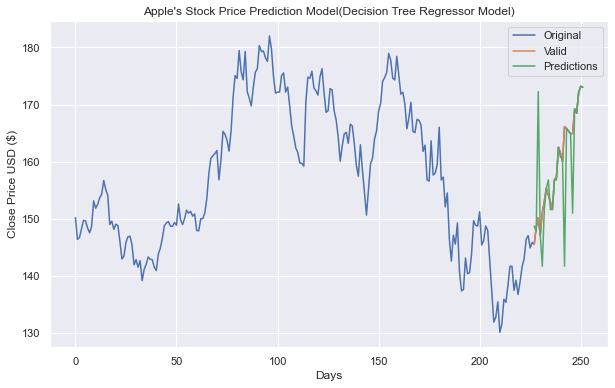

In [98]:
#Visualising decision tree prediction
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

/var/folders/h7/hs52h8h96639qqp_tlhssln80000gn/T/ipykernel_57482/3659707258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


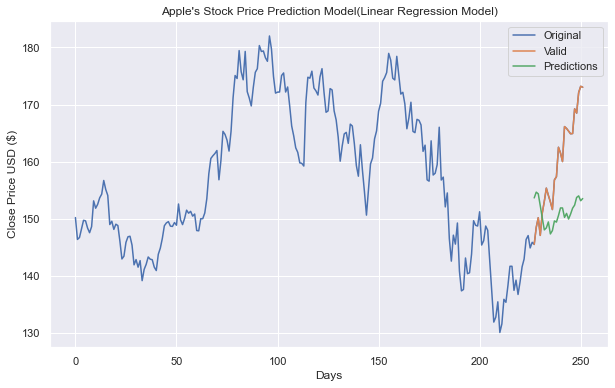

In [99]:
#Visualising the linear model prediction
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()